In [1]:
import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree, neighbors, datasets, metrics, grid_search, svm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
classifier = svm.SVC(gamma=0.001)

%matplotlib inline

In [2]:
# read the data and display the first 5 rows
train_df = pd.read_csv('communities.csv', header=0)
print(train_df.shape)
train_df.head()

(1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [3]:
train_df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Separate data into 2 equal portions for training and testing

n_samples = np.round(len(train_df)/2)
new_train_df = train_df.iloc[0:n_samples]
new_test_df = train_df.iloc[n_samples:]

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\index.py:687: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


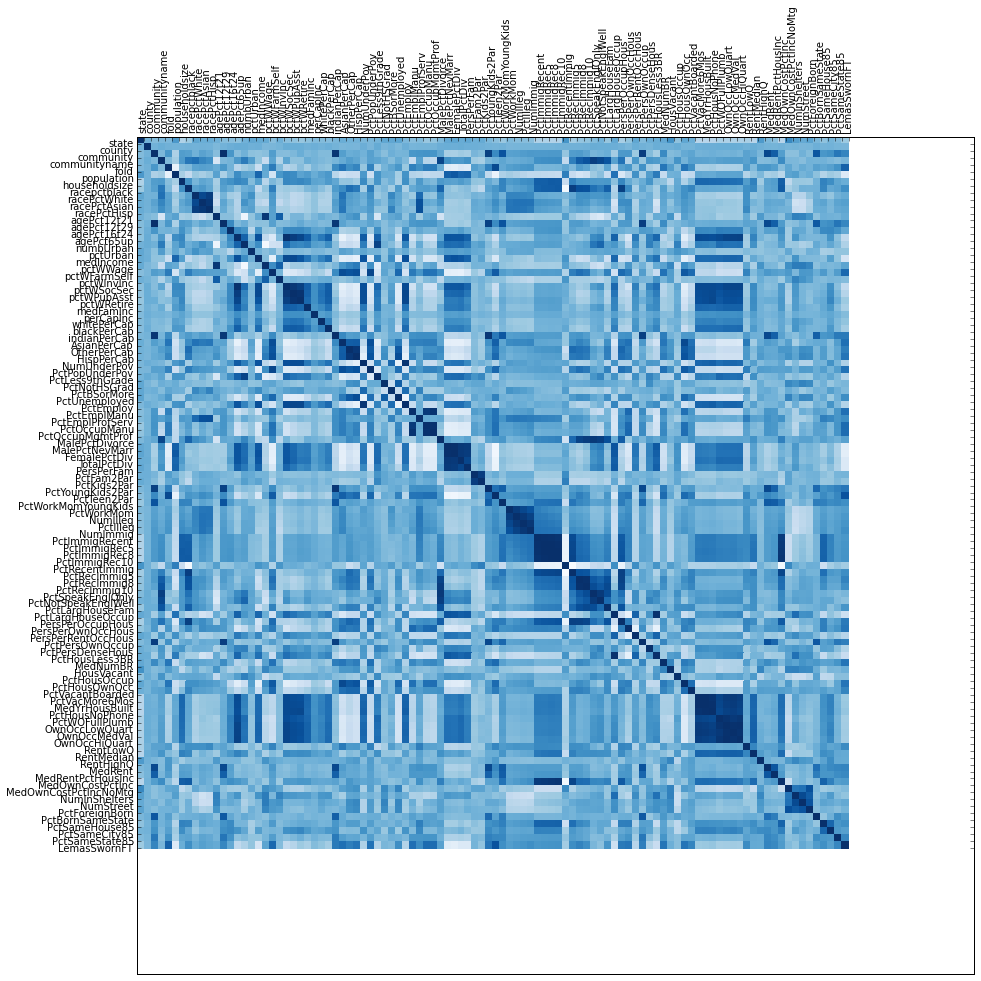

In [5]:
#Create a heat map of featurs vs features to help determine which features are correlated

corr_data = train_df.corr(method='pearson', min_periods=1)
column_labels = train_df.columns.values.tolist() 
row_labels = row_labels = train_df.columns.values.tolist()
train_df.columns.values.tolist()
data = corr_data

fig = plt.figure(figsize=(40,15))
ax = fig.add_subplot(122)
#fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[0])+1, minor=False)
ax.set_yticks(np.arange(data.shape[1])+1, minor=False)
ax.set_aspect(1)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False, rotation='vertical')
ax.set_yticklabels(column_labels, minor=False, rotation='horizontal')
#plt.savefig("heatmap-correlations.jpg", dpi=150)
plt.show()

#Race Correlation to Violent Crime

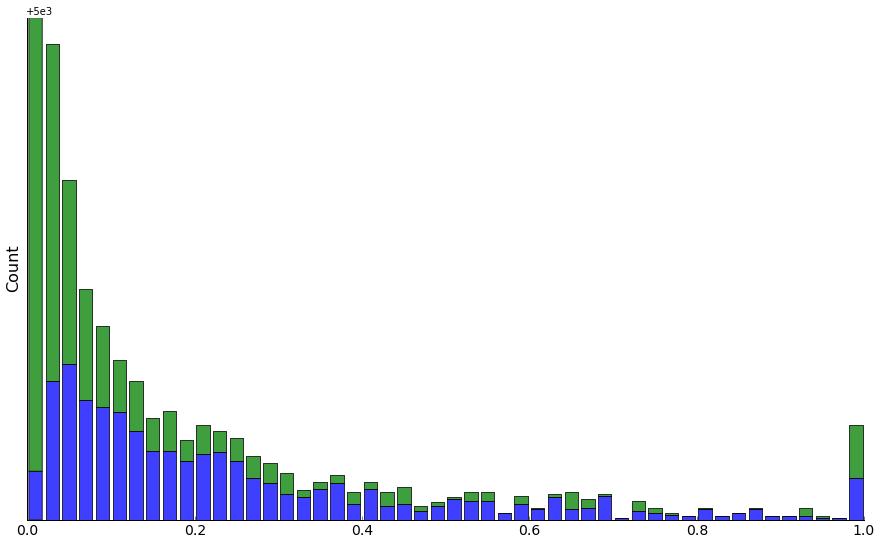

In [6]:
#Graph of the number of crimes based on the percentage of the population that Hispanics make up

import pandas as pd  
import matplotlib.pyplot as plt  

  
plt.figure(figsize=(15, 9))  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
plt.grid(False)

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

plt.xticks(fontsize=14)  
plt.yticks(range(5000, 30001, 5000), fontsize=14)  


#plt.xlabel("Violent Crimes", fontsize=16)  
plt.ylabel("Count", fontsize=16)  


data = [new_train_df['ViolentCrimesPerPop'], new_train_df['racePctHisp']]
my_plot = plt.hist(data, 50,stacked=True, normed=1, alpha=0.75)

  



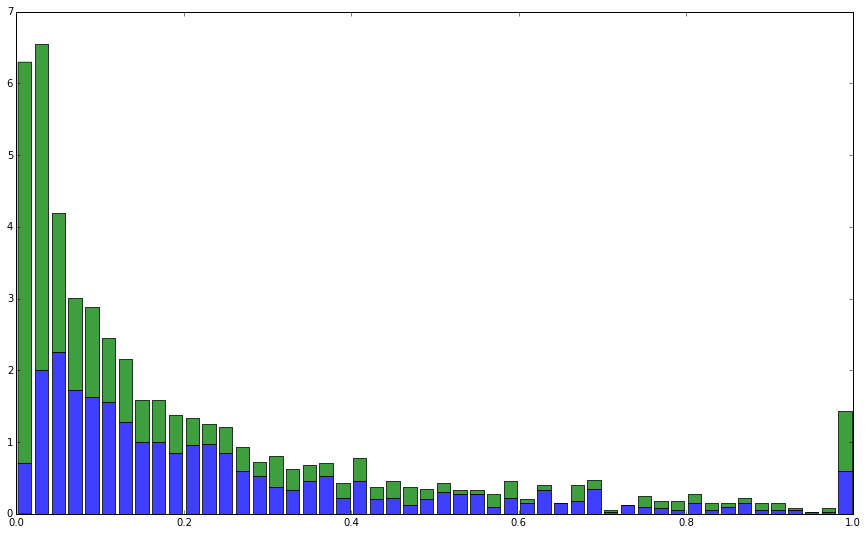

In [7]:
#Graph of the number of crimes based on the percentage of the population that African Americans make up

data = [new_train_df['ViolentCrimesPerPop'], new_train_df['racepctblack']]
plt.figure(figsize=(15, 9))  
my_plot = plt.hist(data, 50,stacked=True, normed=1, alpha=0.75)

#feature engineering / selection

In [8]:
#feature engineering // selection

# We tried a few different combinations of related features and compared the results. We selected the features that 
# made the most impact. We initially grouped the features manually based on ones we felt might be related. We chose the
# final features based on the ones that made the best predictors.

#feature selection
#all features
col = ['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap']

#features related to race
#col = ['population', 'householdsize', 'numbUrban', 'pctUrban', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24','agePct65up']

#features related to income
#col = ['population', 'householdsize', 'medIncome', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'NumUnderPov', 'PctPopUnderPov']

#features related to status
#col = ['MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctWorkMomYoungKids', 'PctWorkMom']

#feaures related to house status
#col = ['population', 'householdsize', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb']

#features related to rent
#col = ['population', 'householdsize', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc']


#PCA

In [9]:
# PCA using different numbers of dimensions. 10 features performed best.

from sklearn.decomposition import PCA

dims = [1,2,3,4,5,6,7,8,9,10,16]
#col = ['population','racepctblack','racePctWhite','racePctHisp']
#col = ':126'

for d in dims: 
    pca = PCA(n_components=d)
    pca.fit(new_train_df[col], new_train_df['ViolentCrimesPerPop'])
    pca_score = pca.explained_variance_ratio_
    V = pca.components_
    print(np.cumsum(pca_score)[-1])



0.306252443308
0.499748492802
0.663680640976
0.768420947156
0.825917037655
0.874327562764
0.91308116472
0.945664421134
0.971177555761
0.989286879442
1.0


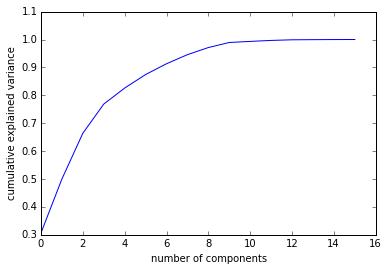

In [10]:


%matplotlib inline

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [49]:
cov_mat = np.cov(new_train_df[col].T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [50]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
#print('Everything ok!')

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

In [51]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(16,1),
                      eig_pairs[1][1].reshape(16,1)))

#print('Matrix W:\n', matrix_w)

In [37]:
#Y = new_train_df[col].dot(matrix_w)
X = pca.transform(new_train_df[col])
X.shape


(997, 5)

#Decision Tree Regressor

In [41]:
# Decision Tree Re

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(min_samples_split = 100, min_samples_leaf=1)
model = model.fit( new_train_df[col], new_train_df['ViolentCrimesPerPop'])

pred = model.predict(new_test_df[col])

#pred_Y = model.predict(X[col])

rms = np.sqrt(np.mean(np.square(pred - new_test_df['ViolentCrimesPerPop'])))
print("RMS error (ViolentCrimesPerPop):",rms)

#rms_Y = np.sqrt(np.mean(np.square(pred_Y - X['ViolentCrimesPerPop'])))
#print("RMS error (ViolentCrimesPerPop Y):",rms_Y)
print(model.get_params())

print()

RMS error (ViolentCrimesPerPop): 0.163139746915
{'random_state': None, 'max_leaf_nodes': None, 'min_samples_split': 100, 'criterion': 'mse', 'splitter': 'best', 'max_depth': None, 'compute_importances': None, 'min_density': None, 'min_samples_leaf': 1, 'max_features': None}



In [22]:
# fit the model to the data
model_reg = DecisionTreeRegressor(min_samples_split = 100, min_samples_leaf=1)


model_reg = model_reg.fit( new_train_df[col], new_train_df['ViolentCrimesPerPop'])
#model_cas = model_cas.fit( train_df[col_cas], train_df['casual'])

# observe the prediction (on the training data: LIKELY OVERFITTING)
pred_count_reg = model_reg.predict(new_train_df[col])
#pred_count_cas = model_cas.predict(train_df[col_cas])


# score the model (PROBABLY OVERFITTING)
rms_reg = np.sqrt(np.mean(np.square(pred_count_reg - new_train_df['ViolentCrimesPerPop'])))
print("RMS error:",rms_reg)

#rms_cas = np.sqrt(np.mean(np.square(pred_count_cas - train_df['casual'])))
#print("RMS error (casual):",rms_cas)
#print()

score_reg = model_reg.score(new_train_df[col], new_train_df['ViolentCrimesPerPop'], sample_weight=None)
print("Sample pred: ", pred_count_reg[0:10])
#print(train_df['registered'].values[0:25])
print("Accuracy: ",score_reg)
print()
#score_cas = model_cas.score(train_df[col_cas], train_df['casual'], sample_weight=None)
#print("Sample pred (casual): ", pred_count_cas[0:10])
#print(train_df['casual'].values[0:25])
#print("Accuracy (casual): ",score_cas)

print((pred_count_reg).shape)
print((train_df).shape)


RMS error: 0.151845319326
Sample pred:  [ 0.19077922  0.33802083  0.586       0.68810345  0.098       0.19254545
  0.08077922  0.33802083  0.26338235  0.04211268]
Accuracy:  0.60107665149

(997,)
(1994, 128)


In [26]:
predicted_dtr = model_reg.predict(new_test_df[col],)
expected_dtr = new_test_df['ViolentCrimesPerPop']
print ("RMS:", np.sqrt(np.mean((predicted_dtr - expected_dtr) ** 2)))

RMS: 0.164069842559


#Random Forest Regressor

RMS error: 0.0594648441777
Sample pred:  [ 0.197525  0.55255   0.421975  0.262675  0.042275  0.15985   0.041925
  0.4623    0.418525  0.119075]
Accuracy:  0.938820319061
{'max_leaf_nodes': None, 'min_samples_split': 2, 'verbose': 0, 'random_state': None, 'min_density': None, 'n_estimators': 400, 'oob_score': False, 'criterion': 'mse', 'bootstrap': True, 'max_depth': None, 'compute_importances': None, 'min_samples_leaf': 1, 'max_features': 'auto', 'n_jobs': 1}



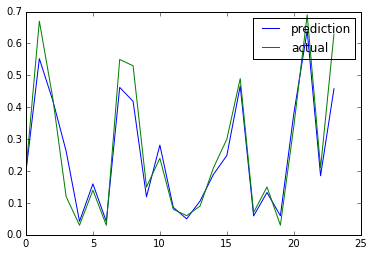

In [43]:
# fit the model to the data
model = RandomForestRegressor(n_estimators = 400)
model_clf = model.fit( new_train_df[col], new_train_df['ViolentCrimesPerPop'])

# observe the prediction (on the training data: LIKELY OVERFITTING)
pred_count = model_clf.predict(new_train_df[col])
plt.hold('on')
plt.plot(range(24),pred_count[0:24])
plt.plot(range(24),new_train_df['ViolentCrimesPerPop'][0:24])
plt.hold('off')
plt.legend(['prediction','actual'])

# score the model 
rms = np.sqrt(np.mean(np.square(pred_count - new_train_df['ViolentCrimesPerPop'])))
print("RMS error:",rms)

score_clf = model_clf.score(new_train_df[col], new_train_df['ViolentCrimesPerPop'])
print("Sample pred: ", pred_count[0:10])
print("Accuracy: ",score_clf)
print(model_clf.get_params())
print()


Automatically created module for IPython interactive environment


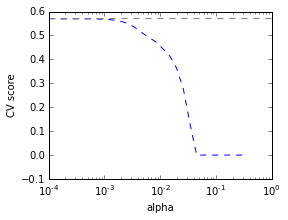

In [14]:
from __future__ import print_function
print(__doc__)

from sklearn import cross_validation, datasets, linear_model


lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, new_train_df[col], new_train_df['ViolentCrimesPerPop'], n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(new_train_df[col])),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(new_train_df[col])),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')

In [25]:
predicted_rfr = model_clf.predict(new_test_df[col],)
expected_rfr = new_test_df['ViolentCrimesPerPop']
print ("RMS:", np.sqrt(np.mean((predicted_rfr - expected_rfr) ** 2)))

RMS: 0.141094305898


#Gradient Boosting Regressor

{'init': None, 'min_samples_split': 2, 'warm_start': False, 'max_leaf_nodes': None, 'subsample': 1.0, 'learning_rate': 0.1, 'n_estimators': 100, 'loss': 'ls', 'verbose': 0, 'random_state': None, 'max_depth': 3, 'min_samples_leaf': 1, 'alpha': 0.9, 'max_features': None}
Sample pred:  [ 0.197525  0.55255   0.421975  0.262675  0.042275  0.15985   0.041925
  0.4623    0.418525  0.119075]
Accuracy:  0.808476605581


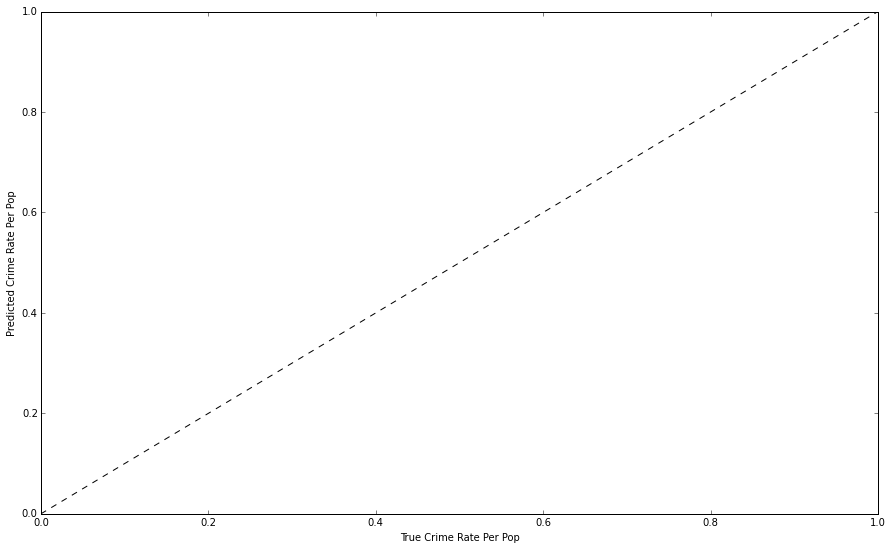

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(new_train_df[col], new_train_df['ViolentCrimesPerPop'])

print(clf.get_params())

predicted = clf.predict(new_test_df[col],)
expected = new_test_df['ViolentCrimesPerPop']

plt.figure(figsize=(15, 9))
plt.scatter(expected, predicted)
plt.plot([0, 1], [0, 1], '--k')
plt.axis('tight')
plt.xlabel('True Crime Rate Per Pop')
plt.ylabel('Predicted Crime Rate Per Pop')

score_clf = clf.score(new_train_df[col], new_train_df['ViolentCrimesPerPop'])
print("Sample pred: ", pred_count[0:10])
print("Accuracy: ",score_clf)



In [47]:
print ("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 0.13827502446


#SVM

In [45]:
from sklearn.cross_validation import *
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=33)
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    print ("Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores))

print(clf.get_params())

from sklearn import svm
clf_svr= svm.SVR(kernel='linear')
train_and_evaluate(clf_svr,new_train_df[col], new_train_df['ViolentCrimesPerPop'])

{'init': None, 'min_samples_split': 2, 'warm_start': False, 'max_leaf_nodes': None, 'subsample': 1.0, 'learning_rate': 0.1, 'n_estimators': 100, 'loss': 'ls', 'verbose': 0, 'random_state': None, 'max_depth': 3, 'min_samples_leaf': 1, 'alpha': 0.9, 'max_features': None}
Coefficient of determination on training set: 0.581913520159
Average coefficient of determination using 5-fold crossvalidation: 0.563431561855


In [17]:
clf_svr_poly= svm.SVR(kernel='poly')
train_and_evaluate(clf_svr_poly,new_train_df[col], new_train_df['ViolentCrimesPerPop'])

Coefficient of determination on training set: 0.419836262635
Average coefficient of determination using 5-fold crossvalidation: 0.378728864905


In [18]:
clf_svr_rbf= svm.SVR(kernel='rbf')
train_and_evaluate(clf_svr_rbf,new_train_df[col], new_train_df['ViolentCrimesPerPop'])

Coefficient of determination on training set: 0.588280195573
Average coefficient of determination using 5-fold crossvalidation: 0.563094625


In [19]:
clf_svr_poly2= svm.SVR(kernel='poly',degree=2)
train_and_evaluate(clf_svr_poly2,new_train_df[col], new_train_df['ViolentCrimesPerPop'])

Coefficient of determination on training set: 0.544047983479
Average coefficient of determination using 5-fold crossvalidation: 0.52562656087


In [20]:
from sklearn import ensemble
clf_et=ensemble.ExtraTreesRegressor(n_estimators=10,random_state=42)
train_and_evaluate(clf_et,new_train_df[col], new_train_df['ViolentCrimesPerPop'])

Coefficient of determination on training set: 1.0
Average coefficient of determination using 5-fold crossvalidation: 0.50400360631


In [24]:
predicted_svm = clf_svr.predict(new_test_df[col],)
expected_svm = new_test_df['ViolentCrimesPerPop']
print ("RMS:", np.sqrt(np.mean((predicted_svm - expected_svm) ** 2)))

RMS: 0.144246705232
